## Satistics : Sampling and Inferences

https://docs.scipy.org/doc/scipy/reference/stats.html

In [82]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Sampling with Montecarlo

#### 1.  Montecarlo Integration

- Example 1

In [ ]:
np.arange(-3,3,0.01)

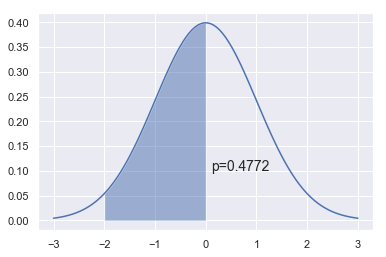

In [83]:
x = np.linspace(-3,3,100)
dist = stats.norm(0,1)
a = -2
b = 0
plt.plot(x, dist.pdf(x))
plt.fill_between(np.linspace(a,b,100), dist.pdf(np.linspace(a,b,100)), alpha=0.5)
plt.text(b+0.1, 0.1, 'p=%.4f' % (dist.cdf(b) - dist.cdf(a)), fontsize=14)
pass

In [89]:
n = 10000
x = stats.norm.rvs(loc=0,scale=1,size=n)

These points are generated randomly. No dependence to each other.

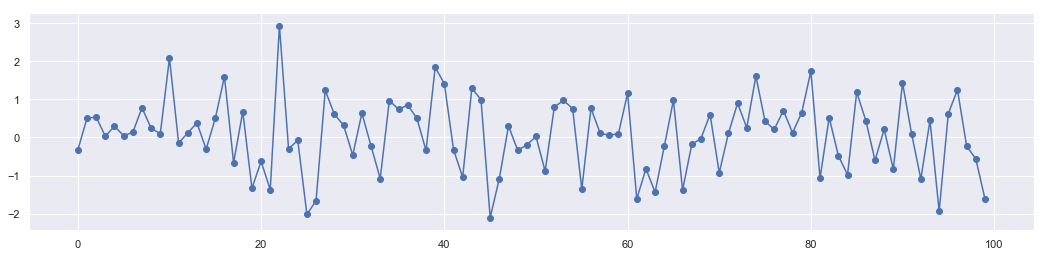

In [90]:
plt.figure(figsize = [18,4])
plt.plot(range(len(x[0:100])),x[0:100])
plt.scatter(range(len(x[0:100])),x[0:100])

In [91]:
np.sum((a < x) & (x < b))/n

0.4733

In [92]:
from scipy.integrate import quad
y, err = quad(dist.pdf, a, b)
y

0.47724986805182085

#### 2. Markov Chain Montecarlo
In statistics, Markov chain Monte Carlo (MCMC) methods comprise a class of algorithms for sampling from a probability distribution. By constructing a Markov chain that has the desired distribution as its equilibrium distribution, one can obtain a sample of the desired distribution by recording states from the chain. The more steps that are included, the more closely the distribution of the sample matches the actual desired distribution. Various algorithms exist for constructing chains, including the Metropolis–Hastings algorithm.

All MCMC sampling schemes have the following structure:

Start with some state xk

Repeat

- Draw a sample xk+1 from a proposal distribution p(xk)
- Calculate the acceptance probability A(x) - in general, this is a function of the proposal and target distributions at xk and xk+1
- Choose a standard random uniform number r
- If r<A(x) set state to be xk+1, otherwise keep state as xk

In [93]:
n = 10000
xs = np.zeros(n)
x = 0
for i in range(n):
    p = np.random.uniform(x-1, x+1)
    a = np.exp(-(p**2-x**2)/2)
    r = np.random.rand()
    if r < a:
        x = p
    xs[i] = x

These data points create a chain call Markov Chain. The sample generation follows principle of detailed balance.

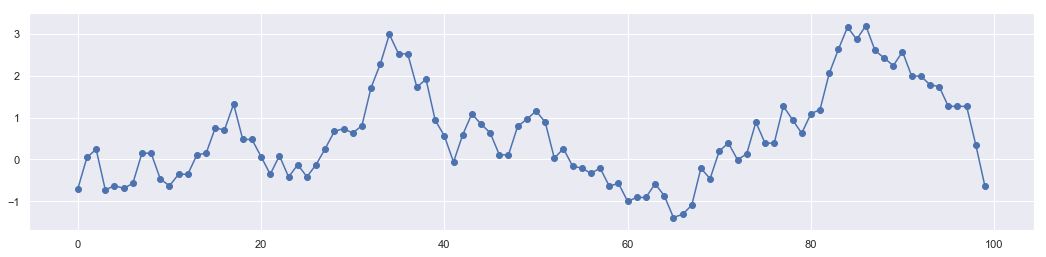

In [94]:
plt.figure(figsize = [18,4])
plt.plot(range(len(xs[0:100])),xs[0:100])
plt.scatter(range(len(xs[0:100])),xs[0:100])

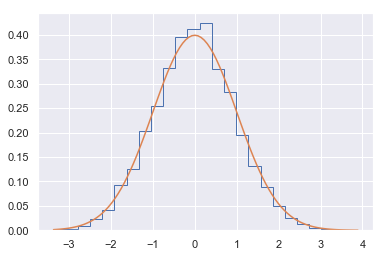

In [95]:
plt.hist(xs, 25, histtype='step', density=True)
xp = np.linspace(xs.min(), xs.max(), 100)
plt.plot(xp, stats.norm().pdf(xp))
pass

#### 3. Gibb's Sampling

In statistics, Gibbs sampling or a Gibbs sampler is a Markov chain Monte Carlo (MCMC) algorithm for obtaining a sequence of observations which are approximated from a specified multivariate probability distribution, when direct sampling is difficult.

Gibbs sampling is a type of random walk through parameter space.

Suppose the parameter vector $\theta$ has two components $\theta= [\theta_1, \theta_2]$, then each iteration of the Gibbs sampler cycles through each component and draws a new value conditional on all the others. There are thus 2 steps for each iteration. We consider the example of the bivariate normal distribution with unknown mean $\theta$, but known covariance matrix

$$\left(\begin{array}{cc}1 & \rho \\ \rho & 1 \end{array}\right).$$
If one observation $X=[x_1, x_2]$ is made and a uniform prior on $\theta$ is used, the posterior is given by

$$ \left(\begin{array}{c} \theta_1 \\ \theta_2 \end{array}\right) \biggr\rvert X \sim N\left(\left(\begin{array}{c}x_1 \\ x_2 \end{array}\right), \left(\begin{array}{cc}1 & \rho \\ \rho & 1 \end{array}\right)\right) $$

In order to illustrate the use of the Gibbs sampler we need the conditional posterior distributions, which from the properties of multivariate normal distributions are given by

$$\theta_1|\theta_2,\: x_1 \text{ ~ } N(\rho\theta_2,\: 1-\rho^2) \text{ ~ } \rho\theta_2 + \sqrt{1-\rho^2}N(0,\:1)$$
$$\theta_2|\theta_1,\: x_2 \text{ ~ } N(\rho\theta_1,\: 1-\rho^2) \text{ ~ } \rho\theta_1 + \sqrt{1-\rho^2}N(0,\:1)$$

The Gibbs sampler proceeds by alternately sampling from these two normal distributions. This is now coded in simple Python deliberately making the steps obvious.

- Experiemnt -1 (Flat distribution)

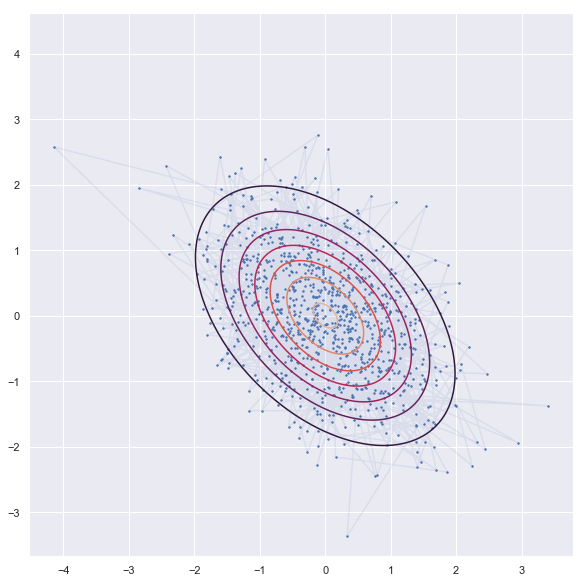

In [96]:
'''sampling'''
rho = -0.45
niter = 1000
xs = np.zeros((niter, 2))

x1,x2=0,0
xs[0,:] = x1,x2

for i in range(1,niter):
    x1 = np.random.normal(rho*x2, 1-rho**2)
    x2 = np.random.normal(rho*x1, 1-rho**2)
    xs[i,:] = x1,x2

'''contor'''
dist = stats.multivariate_normal([0,0], np.array([[1,rho],[rho,1]]))
x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-3.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

'''plot'''
plt.figure(figsize = [18,10])
plt.contour(X, Y, Z)
plt.scatter(xs[:, 0], xs[:, 1], s=2)
plt.plot(xs[:, 0], xs[:, 1],alpha = 0.1)
plt.axis('square')
plt.show()

- Experiment -2 (Narrow distribution)

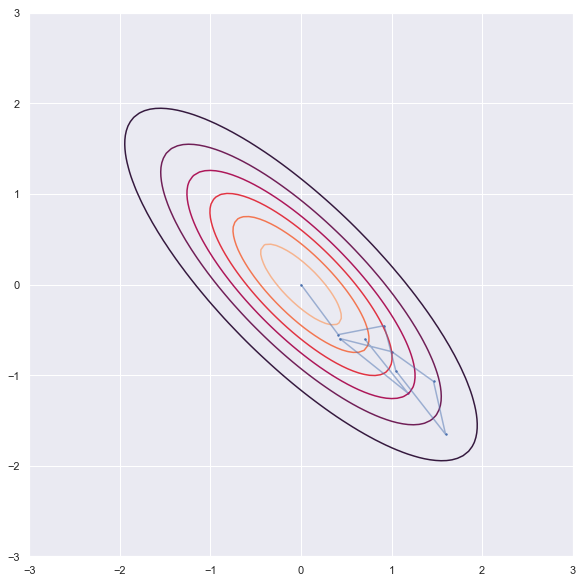

In [103]:
'''sampling'''
rho = -0.8
niter = 10
xs = np.zeros((niter, 2))

x1,x2=0,0
xs[0,:] = x1,x2

for i in range(1,niter):
    x1 = np.random.normal(rho*x2, 1-rho**2)
    x2 = np.random.normal(rho*x1, 1-rho**2)
    xs[i,:] = x1,x2

'''contor'''
dist = stats.multivariate_normal([0,0], np.array([[1,rho],[rho,1]]))
x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-3.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

'''plot'''
plt.figure(figsize = [18,10])
plt.contour(X, Y, Z)
plt.scatter(xs[:, 0], xs[:, 1], s=2)
plt.plot(xs[:, 0], xs[:, 1],alpha = 0.5)
plt.axis('square')
plt.show()

#### 4. [Metropolice Hasting](https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/)

In statistics and statistical physics, the Metropolis–Hastings algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult.

In [98]:
def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2

def pgauss(x, y):
    return stats.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)

In [99]:
def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        
        frac = p(x_star, y_star)/p(x, y)
        
        if np.random.rand() < frac:
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples

In [100]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])

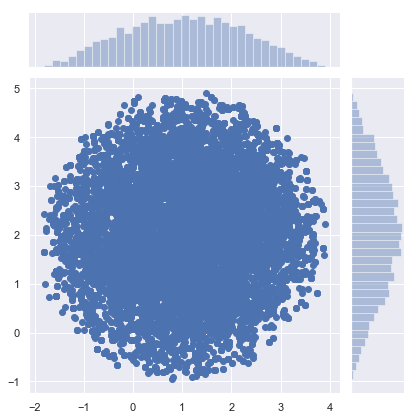

In [101]:
samples = metropolis_hastings(circle, iter=10000)
sns.jointplot(samples[:, 0], samples[:, 1])

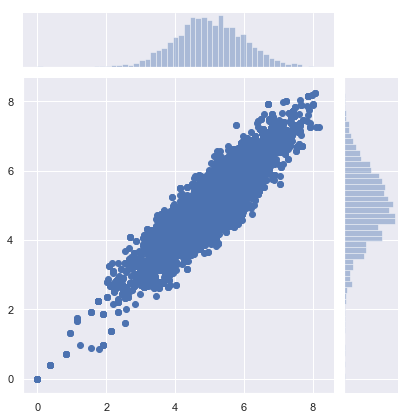

In [102]:
samples = metropolis_hastings(pgauss, iter=10000)
sns.jointplot(samples[:, 0], samples[:, 1])